<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/1_Aula-Cria%C3%A7%C3%A3o%20de%20Modelos%20ML_Implementa%C3%A7%C3%A3o_do_Algoritmo_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerando Modelo de Machine Learning (Classificação)
# Preparação dos Dados e Treinamento do Modelo de Machine Learning - Parte 1.

In [ ]:
# Autor: Ricardo Roberto de Lima - Data: 12/04/2022 - Aula de Ciência de Dados - Mostrar pra mãe..

In [1]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

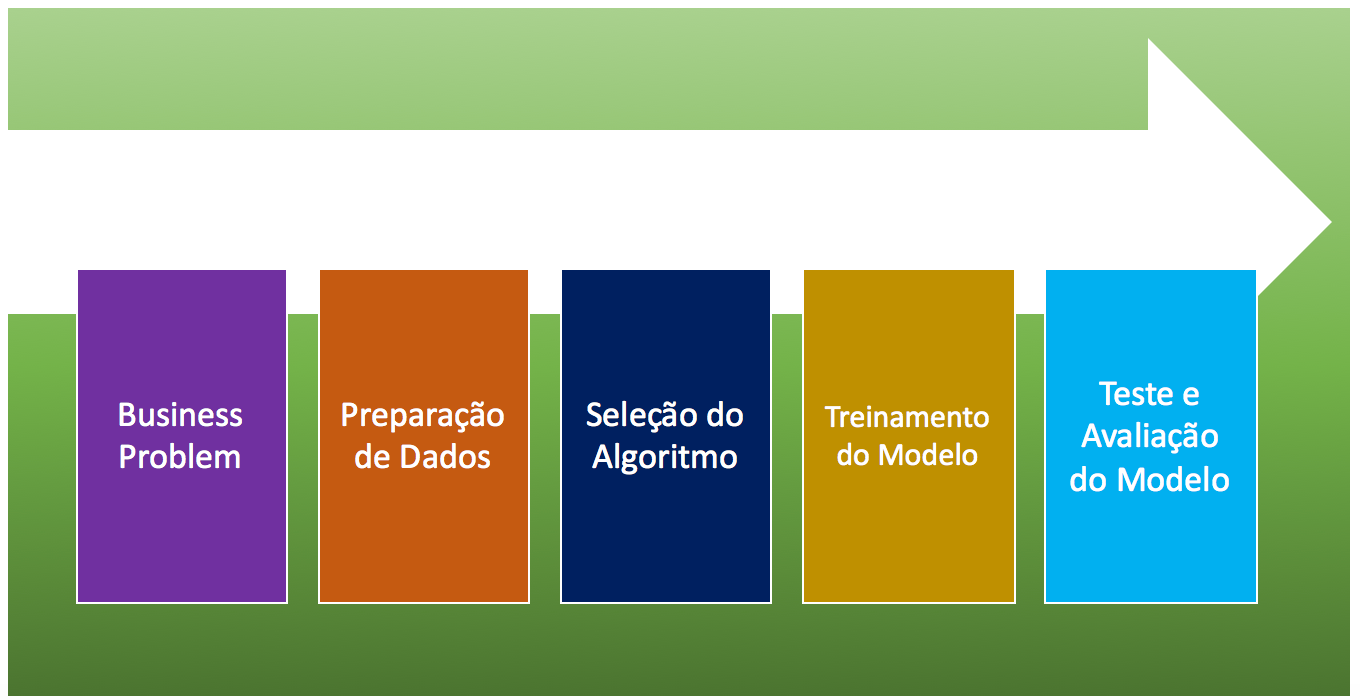

In [ ]:
# Estrutura Inicial para um Projeto de Machine Learning.
from IPython.display import Image
Image('Workflow.png')

In [2]:
#Carrega o dataset com os dados para o treinamento e validacao
dados_mamiferos_treino = pd.read_csv("dados_mamiferos_treino.csv", encoding="utf-8")

In [4]:
dados_mamiferos_treino.head(8)

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
0,1,humano,1,2,2,2,1
1,2,cobra,2,1,2,2,0
2,3,baleia,1,2,2,1,1
3,4,sapo,1,1,2,3,0
4,5,morcego,1,2,1,2,1
5,6,pombo,1,1,1,2,0
6,7,gato,1,2,2,2,1
7,8,tartaruga,2,1,2,3,0


In [5]:
dados_mamiferos_treino.tail(7)

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
9,10,porco-espinho,1,2,2,2,1
10,11,enguia,2,1,2,1,0
11,12,salamandra,2,1,2,3,0
12,13,coruja,1,1,1,2,0
13,14,golfinho,1,2,2,1,1
14,15,águia,1,1,1,2,0
15,16,ornitorrinco,1,1,2,2,1


In [6]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(dados_mamiferos_treino[['sangue', 'bota_ovo', 'voa', 'mora_agua']])
#Definição do atributo de classificacao
data_classif = np.array(dados_mamiferos_treino['classificacao'])

In [7]:
# Verificando o formato dos dados
dados_mamiferos_treino.shape

(16, 7)

In [ ]:
# Verificando as primeiras linhas do dataset
dados_mamiferos_treino.head(10)

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
0,1,humano,1,2,2,2,1
1,2,cobra,2,1,2,2,0
2,3,baleia,1,2,2,1,1
3,4,sapo,1,1,2,3,0
4,5,morcego,1,2,1,2,1
5,6,pombo,1,1,1,2,0
6,7,gato,1,2,2,2,1
7,8,tartaruga,2,1,2,3,0
8,9,pinguim,1,1,2,3,0
9,10,porco-espinho,1,2,2,2,1


In [ ]:
# Verificando as últimas linhas do dataset
dados_mamiferos_treino.tail(5)

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
11,12,salamandra,2,1,2,3,0
12,13,coruja,1,1,1,2,0
13,14,golfinho,1,2,2,1,1
14,15,águia,1,1,1,2,0
15,16,ornitorrinco,1,1,2,2,1


In [8]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados_mamiferos_treino, size=10):
    corr = dados_mamiferos_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

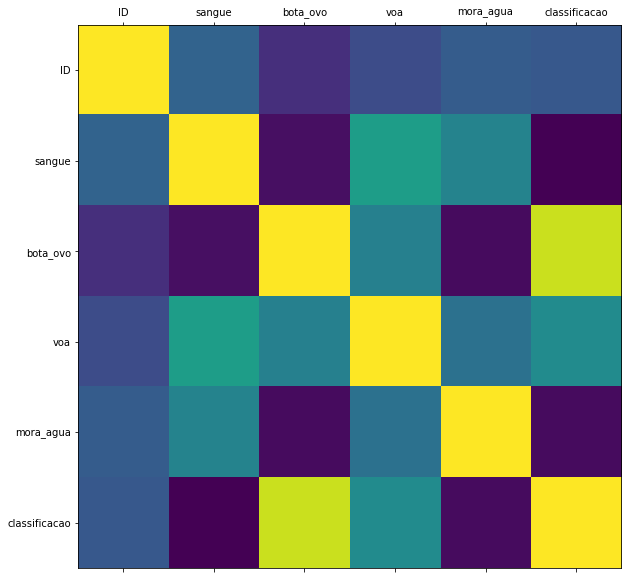

In [9]:
# Criando o gráfico
plot_corr(dados_mamiferos_treino)

In [ ]:
# Spliting = 70% para dados de treino e 30% para dados de teste

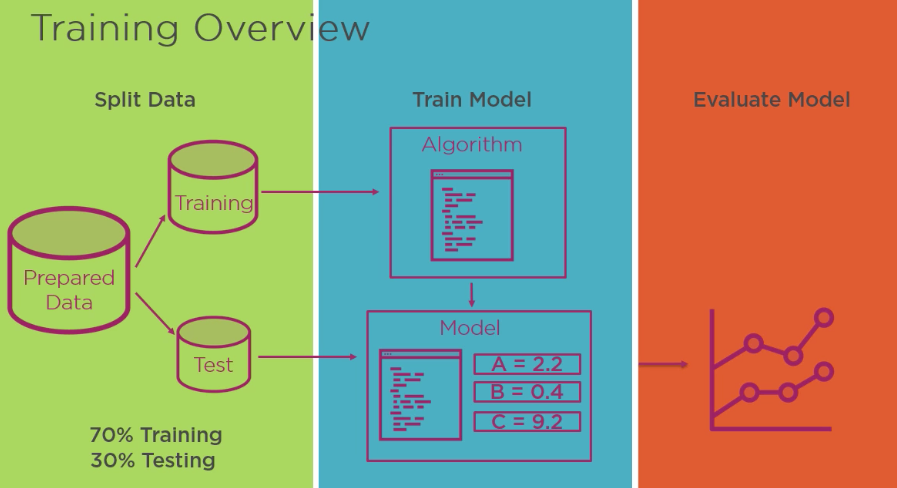

In [ ]:
from IPython.display import Image
Image('Treinamento.png')

In [10]:
#Definição dos conjuntos de treinamento e teste
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.25)

In [11]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[1 1 1 2]
 [1 2 2 2]
 [1 2 2 1]
 [1 1 2 3]
 [1 2 2 1]
 [2 1 2 3]
 [2 1 2 2]
 [1 2 1 2]
 [1 1 1 2]
 [1 1 1 2]
 [2 1 2 1]
 [1 1 2 2]]
Conjunto de Validacao
[[1 2 2 2]
 [1 1 2 3]
 [1 2 2 2]
 [2 1 2 3]]
-----------------------


In [12]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_mamiferos_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_mamiferos_treino.index)) * 100))

75.00% nos dados de treino
25.00% nos dados de teste


In [13]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [14]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [15]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.9166666666666666
Na Base de Treinamento


In [16]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste e ou Validação")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
1.0
na Base de Teste e ou Validação


In [17]:
from sklearn import metrics

In [18]:
# Métricas

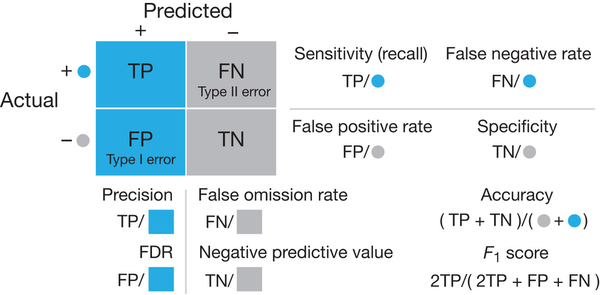

In [ ]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [19]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[2 0]
 [0 2]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
# Criando uma Curva Roc
print("Roc Curve")

# Compute ROC curve and ROC area for each class
#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#for i in range(y_pred_val):
#    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_val)
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Roc Curve


In [20]:
# Otimizando o modelo com RandomForest
# Algoritmo 02 - RandomForest - Realizando operações com mais de um Algoritmo de Machine Learning (Classificação)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [23]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [24]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 1.0000



In [25]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[2 0]
 [0 2]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [26]:
#Regressão Logística

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [29]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 1.0000

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
### Resumindo
## Exatidão nos dados Mamíferos de teste

# Modelo usando algoritmo Naive Bayes         = 0.800  => Segunda Execução: 1.0
# Modelo usando algoritmo Random Forest       = 0.800  => Segunda Execução: 1.0 
# Modelo usando algoritmo Regressão Logística = 0.800  => Segunda Execução: 1.0